In [1]:
# Marketing Campaign A/B Testing Analysis

# Import required libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# Set styling for better visualizations
plt.style.use('seaborn')
sns.set_palette("husl")

C:\Users\luken\AppData\Local\Temp\ipykernel_13300\1510420757.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [3]:
# Data Loading and Preprocessing
# Load both datasets
control_df = pd.read_csv('control_group.csv', sep=';')
test_df = pd.read_csv('test_group.csv', sep=';')

# Add group identifier
control_df['Group'] = 'Control'
test_df['Group'] = 'Test'

# Convert date format
control_df['Date'] = pd.to_datetime(control_df['Date'], format='%d.%m.%Y')
test_df['Date'] = pd.to_datetime(test_df['Date'], format='%d.%m.%Y')

# Combine datasets for easier analysis
combined_df = pd.concat([control_df, test_df], ignore_index=True)

# Display basic information about the datasets
print("Control Group Summary:")
print(control_df.describe())
print("\nTest Group Summary:")
print(test_df.describe())

Control Group Summary:
       Spend [USD]  # of Impressions          Reach  # of Website Clicks  \
count    30.000000         29.000000      29.000000            29.000000   
mean   2288.433333     109559.758621   88844.931034          5320.793103   
std     367.334451      21688.922908   21832.349595          1757.369003   
min    1757.000000      71274.000000   42859.000000          2277.000000   
25%    1945.500000      92029.000000   74192.000000          4085.000000   
50%    2299.500000     113430.000000   91579.000000          5224.000000   
75%    2532.000000     121332.000000  102479.000000          6628.000000   
max    3083.000000     145248.000000  127852.000000          8137.000000   

       # of Searches  # of View Content  # of Add to Cart  # of Purchase  
count      29.000000          29.000000         29.000000      29.000000  
mean     2221.310345        1943.793103       1300.000000     522.793103  
std       866.089368         777.545469        407.457973     185.0

In [4]:
# Calculate key metrics
def calculate_metrics(df):
    metrics = {
        'Total Spend': df['Spend [USD]'].sum(),
        'Total Impressions': df['# of Impressions'].sum(),
        'Total Reach': df['Reach'].sum(),
        'Total Purchases': df['# of Purchase'].sum(),
        'CTR': (df['# of Website Clicks'].sum() / df['# of Impressions'].sum()) * 100,
        'CVR': (df['# of Purchase'].sum() / df['# of Website Clicks'].sum()) * 100,
        'CPA': df['Spend [USD]'].sum() / df['# of Purchase'].sum(),
        'ROI': ((df['# of Purchase'].sum() * 50) - df['Spend [USD]'].sum()) / df['Spend [USD]'].sum() * 100  # Assuming $50 per purchase
    }
    return pd.Series(metrics)

control_metrics = calculate_metrics(control_df)
test_metrics = calculate_metrics(test_df)

# Display key metrics comparison
metrics_comparison = pd.DataFrame({
    'Control': control_metrics,
    'Test': test_metrics,
    'Difference %': ((test_metrics - control_metrics) / control_metrics * 100).round(2)
})

print("\nKey Metrics Comparison:")
print(metrics_comparison)


Key Metrics Comparison:
                        Control          Test  Difference %
Total Spend        6.865300e+04  7.689200e+04         12.00
Total Impressions  3.177233e+06  2.237544e+06        -29.58
Total Reach        2.576503e+06  1.604747e+06        -37.72
Total Purchases    1.516100e+04  1.563700e+04          3.14
CTR                4.856521e+00  8.087886e+00         66.54
CVR                9.825473e+00  8.640659e+00        -12.06
CPA                4.528263e+00  4.917312e+00          8.59
ROI                1.004176e+03  9.168158e+02         -8.70


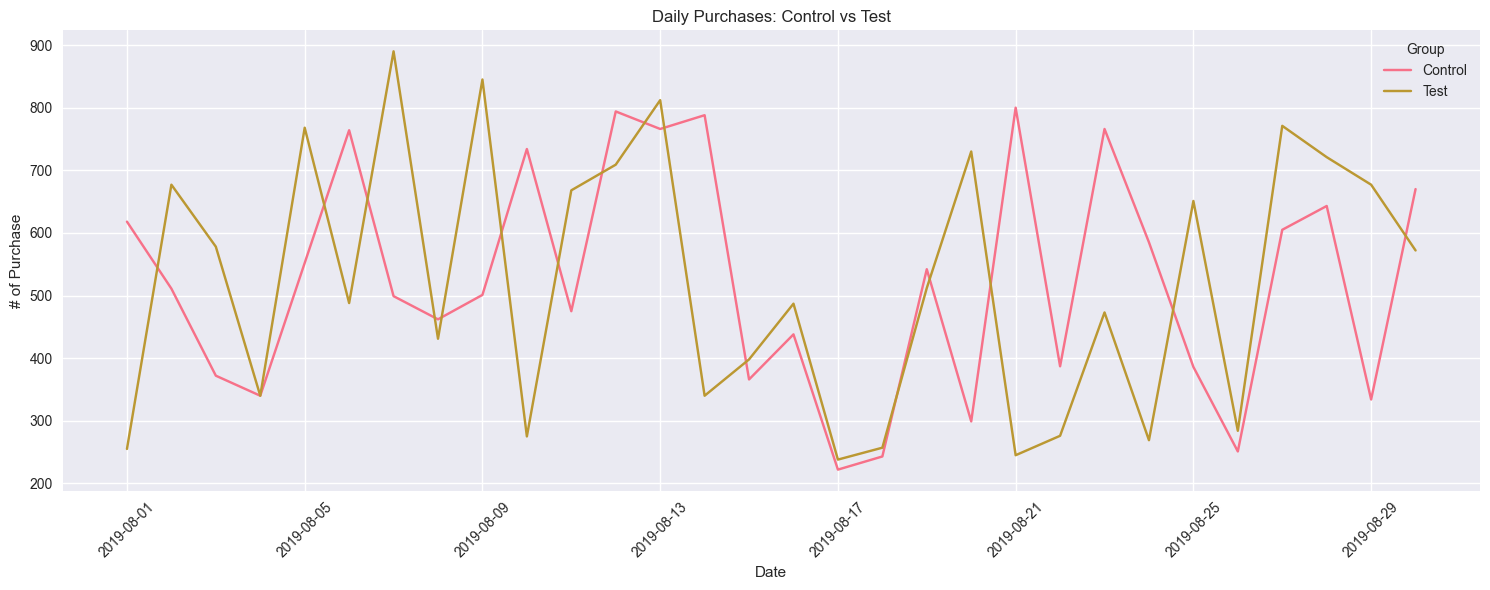

In [5]:
# Visualization Section

# 1. Daily Trends
plt.figure(figsize=(15, 6))
sns.lineplot(data=combined_df, x='Date', y='# of Purchase', hue='Group')
plt.title('Daily Purchases: Control vs Test')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

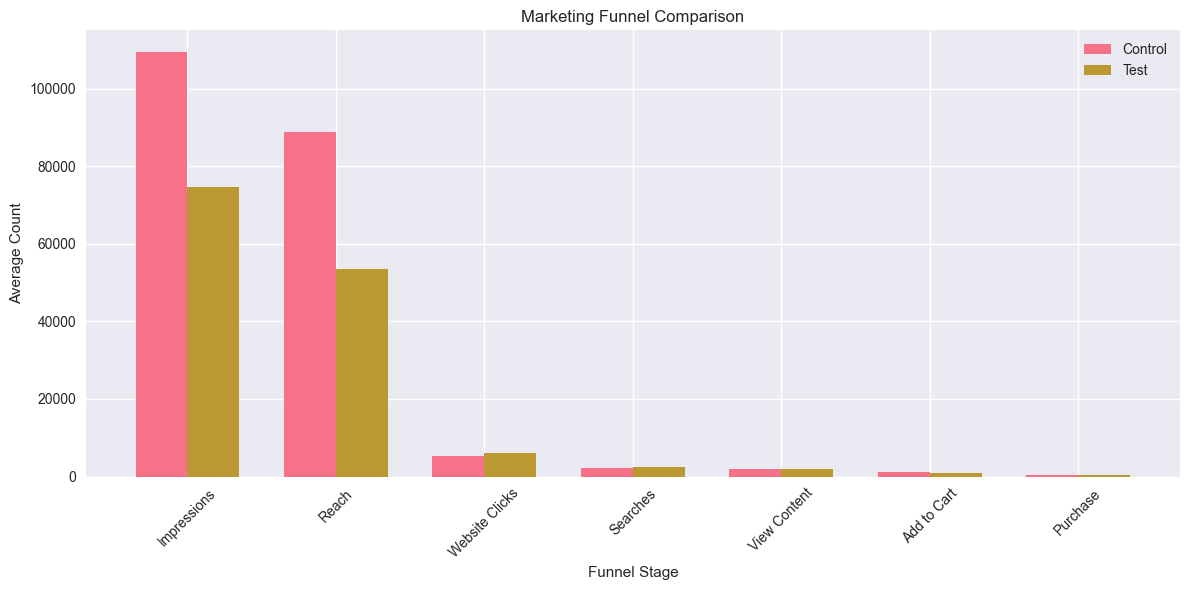

In [6]:
# 2. Conversion Funnel
def plot_funnel(control_df, test_df):
    metrics = ['# of Impressions', 'Reach', '# of Website Clicks', 
              '# of Searches', '# of View Content', '# of Add to Cart', '# of Purchase']
    
    control_values = [control_df[metric].mean() for metric in metrics]
    test_values = [test_df[metric].mean() for metric in metrics]
    
    plt.figure(figsize=(12, 6))
    x = np.arange(len(metrics))
    width = 0.35
    
    plt.bar(x - width/2, control_values, width, label='Control')
    plt.bar(x + width/2, test_values, width, label='Test')
    
    plt.xlabel('Funnel Stage')
    plt.ylabel('Average Count')
    plt.title('Marketing Funnel Comparison')
    plt.xticks(x, [m.replace('# of ', '') for m in metrics], rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_funnel(control_df, test_df)

In [7]:
# Statistical Testing Section

def perform_ttest(metric):
    t_stat, p_value = stats.ttest_ind(
        control_df[metric],
        test_df[metric]
    )
    return t_stat, p_value

# Test key metrics
metrics_to_test = ['# of Purchase', '# of Website Clicks', '# of Add to Cart']
statistical_results = {}

for metric in metrics_to_test:
    t_stat, p_value = perform_ttest(metric)
    statistical_results[metric] = {
        'Control Mean': control_df[metric].mean(),
        'Test Mean': test_df[metric].mean(),
        't-statistic': t_stat,
        'p-value': p_value,
        'Significant': p_value < 0.05
    }

statistical_df = pd.DataFrame(statistical_results).T
print("\nStatistical Test Results:")
print(statistical_df)


Statistical Test Results:
                    Control Mean    Test Mean t-statistic p-value Significant
# of Purchase         522.793103   521.233333         NaN     NaN       False
# of Website Clicks  5320.793103  6032.333333         NaN     NaN       False
# of Add to Cart          1300.0   881.533333         NaN     NaN       False


In [8]:
# ROI Analysis
def calculate_roi_metrics(df, cost_per_purchase=50):
    total_revenue = df['# of Purchase'].sum() * cost_per_purchase
    total_cost = df['Spend [USD]'].sum()
    roi = (total_revenue - total_cost) / total_cost * 100
    
    return {
        'Total Revenue': total_revenue,
        'Total Cost': total_cost,
        'ROI %': roi,
        'Cost per Conversion': total_cost / df['# of Purchase'].sum()
    }

control_roi = calculate_roi_metrics(control_df)
test_roi = calculate_roi_metrics(test_df)

roi_comparison = pd.DataFrame({
    'Control': control_roi,
    'Test': test_roi,
    'Difference %': {k: ((test_roi[k] - control_roi[k]) / control_roi[k] * 100) 
                    for k in control_roi.keys()}
})

print("\nROI Analysis:")
print(roi_comparison)


ROI Analysis:
                           Control           Test  Difference %
Total Revenue        758050.000000  781850.000000      3.139635
Total Cost            68653.000000   76892.000000     12.000932
ROI %                  1004.176074     916.815794     -8.699697
Cost per Conversion       4.528263       4.917312      8.591554


In [9]:
# Confidence Intervals
def calculate_confidence_interval(data, confidence=0.95):
    mean = np.mean(data)
    std_err = stats.sem(data)
    ci = stats.t.interval(confidence, len(data)-1, mean, std_err)
    return mean, ci

metrics_for_ci = ['# of Purchase', '# of Website Clicks', 'Spend [USD]']
ci_results = {}

for metric in metrics_for_ci:
    control_mean, control_ci = calculate_confidence_interval(control_df[metric])
    test_mean, test_ci = calculate_confidence_interval(test_df[metric])
    
    ci_results[metric] = {
        'Control Mean': control_mean,
        'Control CI': control_ci,
        'Test Mean': test_mean,
        'Test CI': test_ci
    }

print("\nConfidence Intervals:")
for metric, results in ci_results.items():
    print(f"\n{metric}:")
    print(f"Control: {results['Control Mean']:.2f} [{results['Control CI'][0]:.2f}, {results['Control CI'][1]:.2f}]")
    print(f"Test: {results['Test Mean']:.2f} [{results['Test CI'][0]:.2f}, {results['Test CI'][1]:.2f}]")



Confidence Intervals:

# of Purchase:
Control: 522.79 [nan, nan]
Test: 521.23 [442.43, 600.04]

# of Website Clicks:
Control: 5320.79 [nan, nan]
Test: 6032.33 [5394.34, 6670.32]

Spend [USD]:
Control: 2288.43 [2151.27, 2425.60]
Test: 2563.07 [2432.86, 2693.27]


In [10]:
# Final Recommendations
print("\nKey Findings and Recommendations:")
significant_metrics = statistical_df[statistical_df['Significant']].index.tolist()
print(f"1. Statistically significant differences found in: {', '.join(significant_metrics)}")
print(f"2. Overall ROI difference: {roi_comparison['Difference %']['ROI %']:.2f}%")

if roi_comparison['Difference %']['ROI %'] > 0:
    print("Recommendation: Consider implementing the test variant due to improved ROI")
else:
    print("Recommendation: Stick with the control variant or conduct further testing")



Key Findings and Recommendations:
1. Statistically significant differences found in: 
2. Overall ROI difference: -8.70%
Recommendation: Stick with the control variant or conduct further testing
